<a href="https://colab.research.google.com/github/RaihanHeggi/Random-Coding-With-Python/blob/master/Signal_Processing_MVA_and_LPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import io 
from scipy.signal import butter, lfilter, freqz

In [ ]:
df_dataset = pd.read_csv("https://raw.githubusercontent.com/RaihanHeggi/Damin/master/Dataset_Signal_Data.csv")
df_dataset.head(5)

,0,1820,2181,1589,1
0,1,1910,2127,1696,1
1,2,1965,2088,1841,1
2,3,1996,2135,1529,1
3,4,1944,2082,1653,1
4,5,2027,2057,1719,1


split data to X,Y,Z

In [ ]:
index = df_dataset.iloc[:,0]
X = df_dataset.iloc[:,1]
Y = df_dataset.iloc[:,2]
Z = df_dataset.iloc[:,3]

##`MVA Filtering`

In [ ]:
def MVA_Filtering(data, window_size):
  return data.rolling(window = window_size).mean()

make simple moving average (10,100,1000)

In [ ]:
#Create a simple moving average (SMA) with a 10 day window
rolling_mean = MVA_Filtering(X, 10)
#Create a simple moving average (SMA) with a 100 day window
rolling_mean2 = MVA_Filtering(Y, 100)
#Create a simple moving average (SMA) with a 1000 day window
rolling_mean3 = MVA_Filtering(Z, 1000)

plotting x,y,z data filter

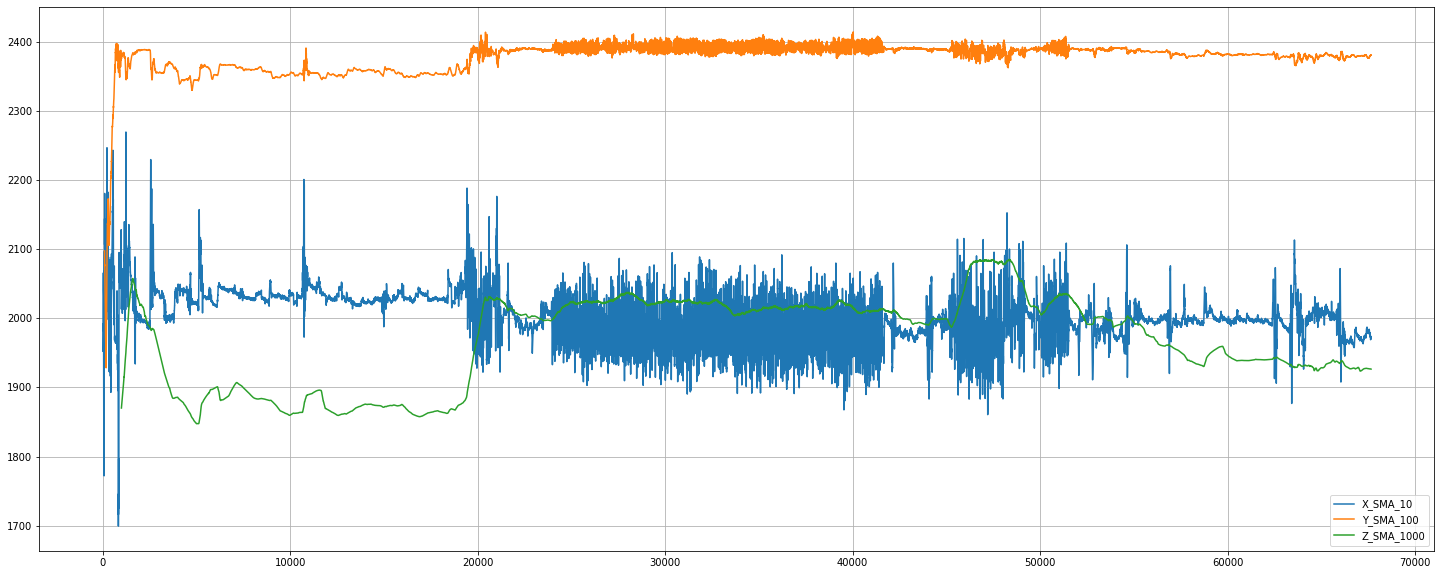

In [ ]:
plt.figure(figsize=[25,10])
plt.grid(True)

plt.plot(rolling_mean, label='X_SMA_10')
plt.plot(rolling_mean2, label='Y_SMA_100')
plt.plot(rolling_mean3, label='Z_SMA_1000')

plt.legend()
plt.show()

X,Y,Z Data Filtering 

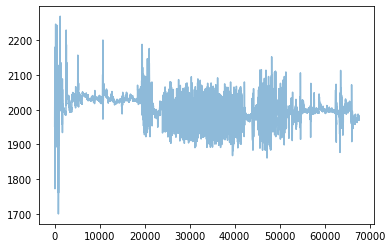

In [ ]:
# X Data
plt.plot(rolling_mean, label='X', alpha = 0.5)

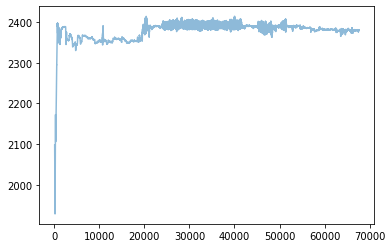

In [ ]:
# Y Data
plt.plot(rolling_mean2, label='Y', alpha = 0.5)

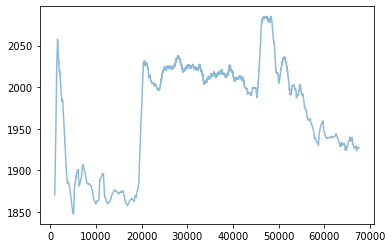

In [ ]:
# X Data
plt.plot(rolling_mean3, label='Z', alpha = 0.5)

## **LPF Filter**

In [ ]:
# https://stackoverflow.com/questions/25191620/

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 30.0   # sample rate, per data
cutoff = 3.667  # cutoff frequency yang diinginkan dari filter

# ambil koefisiensi filter.
b, a = butter_lowpass(cutoff, fs, order)

In [ ]:
#Create a simple moving average (SMA) with a 10 day window
LPF = butter_lowpass_filter(X, cutoff, fs, order)
#Create a simple moving average (SMA) with a 100 day window
LPF1 = butter_lowpass_filter(Y, cutoff, fs, order)
#Create a simple moving average (SMA) with a 1000 day window
LPF2 = butter_lowpass_filter(Z, cutoff, fs, order)

Plotting LPF Filtering using X,Y,Z

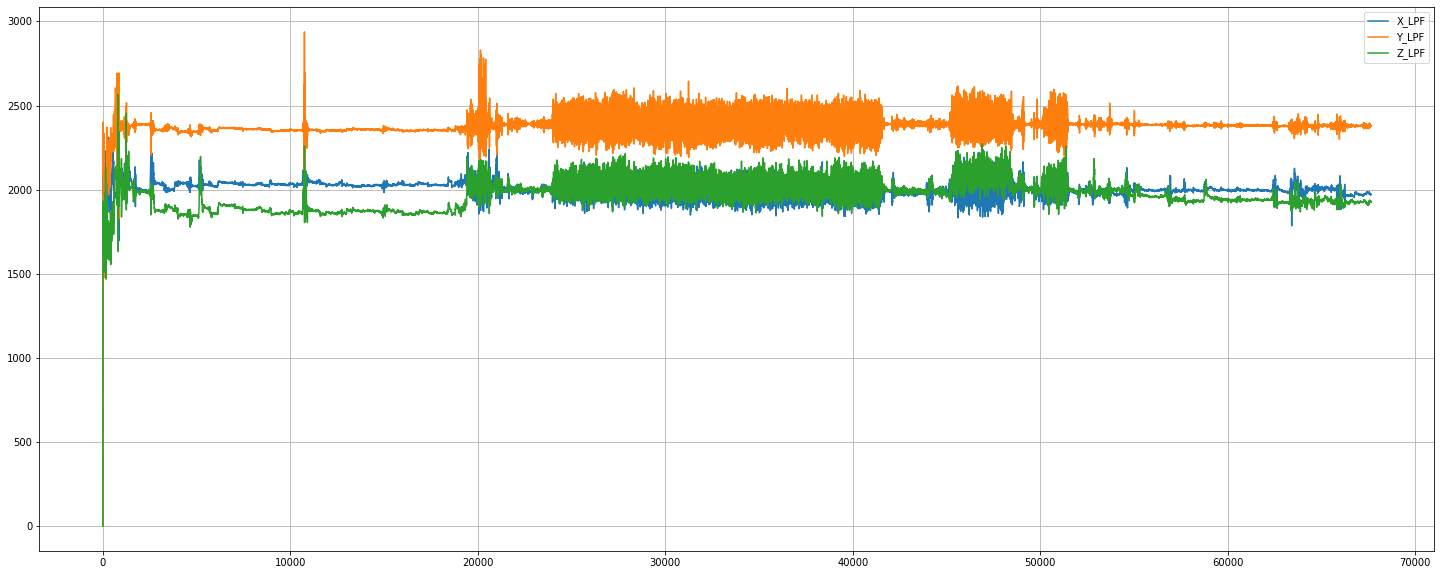

In [ ]:
plt.figure(figsize=[25,10])
plt.grid(True)

plt.plot(LPF, label='X_LPF')
plt.plot(LPF1, label='Y_LPF')
plt.plot(LPF2, label='Z_LPF')

plt.legend()
plt.show()

Plotting individually X,Y,Z

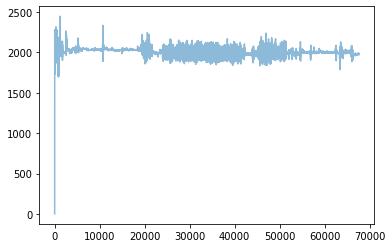

In [ ]:
# X Data
plt.plot(LPF, label='X', alpha = 0.5)

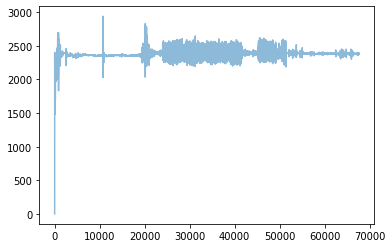

In [ ]:
# Y Data
plt.plot(LPF1, label='Y', alpha = 0.5)

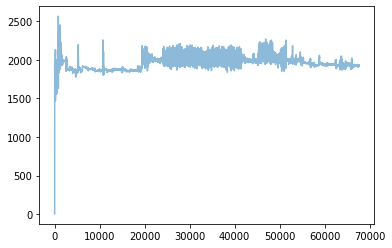

In [ ]:
# Z Data
plt.plot(LPF2 , label='Z', alpha = 0.5)